# Normal Distribution

A normal distribution, also known as a Gaussian distribution or bell curve, is a statistical distribution that is symmetric and follows a specific pattern. It is characterized by its mean (average) and standard deviation.

In a normal distribution:

1. The data is symmetrically distributed around the mean. The mean, median, and mode of a normal distribution are all equal.

2. The curve of the distribution is bell-shaped, with the highest point at the mean and tapering off on either side.

3. The standard deviation determines the spread of the data. A larger standard deviation results in a wider distribution, while a smaller standard deviation leads to a narrower distribution.

4. The total area under the curve is equal to 1, representing the probability of all possible values.

Normal distributions are commonly observed in many natural and social phenomena, such as human heights, IQ scores, and measurement errors. They play a significant role in statistical analysis and hypothesis testing, as many statistical methods assume the underlying data to be normally distributed.

# How to check if the data is normalized or not?

To determine if your data is normalized, you can perform various tests and examine specific characteristics of the data. Here are some common methods:

1. Visual inspection: Plotting histograms or box plots of your data can provide a visual indication of its distribution. Normalized data typically follows a bell-shaped curve (Gaussian distribution) without significant skewness or outliers.

2. Kolmogorov-Smirnov test: This statistical test compares your data distribution to a theoretical normal distribution. If the test results in a high p-value (e.g., greater than 0.05), it suggests that your data is normally distributed.

3. Shapiro-Wilk test: Similar to the Kolmogorov-Smirnov test, the Shapiro-Wilk test assesses whether your data follows a normal distribution. If the p-value is greater than 0.05, it implies your data is normally distributed.

4. QQ plot (Quantile-Quantile plot): A QQ plot compares the quantiles of your data against a theoretical normal distribution. If the points on the plot closely align with a straight line, it indicates that your data is normally distributed.

5. Skewness and kurtosis: Skewness measures the asymmetry of the data distribution, while kurtosis measures the peakedness or flatness of the distribution. For normalized data, the skewness should be close to zero, and the kurtosis should be close to 3 (for a standard normal distribution).

## Applying the test on Titanic Dataset


In [ ]:
# loading the data
import pandas as pd
import numpy as np
from scipy.stats import shapiro, normaltest
import matplotlib.pyplot as plt
df = pd.read_csv('titanic.csv')


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
age_data = df['Age'].dropna()  # Remove missing values
fare_data = df['Fare']


## Visualization

Visualizing the data using histogram, Kde plot and QQ plot

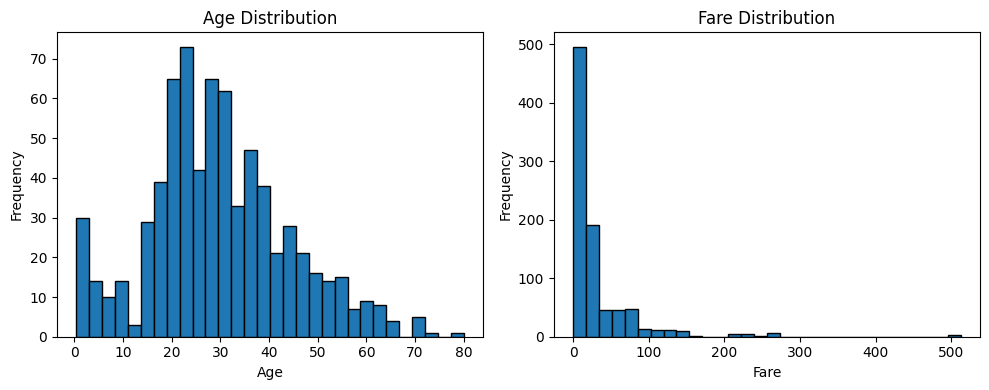

In [ ]:
# histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(age_data, bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.hist(fare_data, bins=30, edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()


<ipython-input-7-af06bc8945b4>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_data, shade=True)


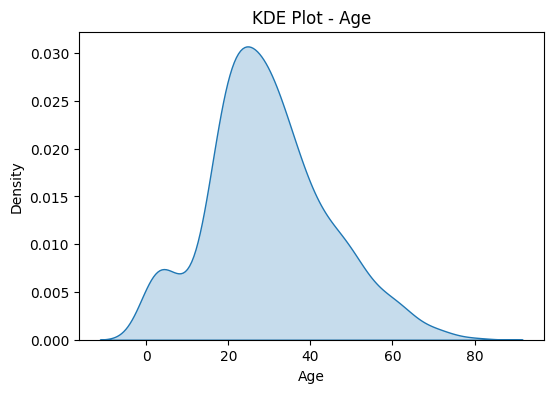

In [ ]:
# kde( kernel density estimation) plot
# Create the KDE plot
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.kdeplot(age_data, shade=True)
plt.title("KDE Plot - Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


## QQ Plot

A QQ plot (Quantile-Quantile plot) is a graphical tool used to assess if a dataset follows a specific theoretical distribution, such as a normal distribution. It compares the quantiles of the observed data against the quantiles of the theoretical distribution.
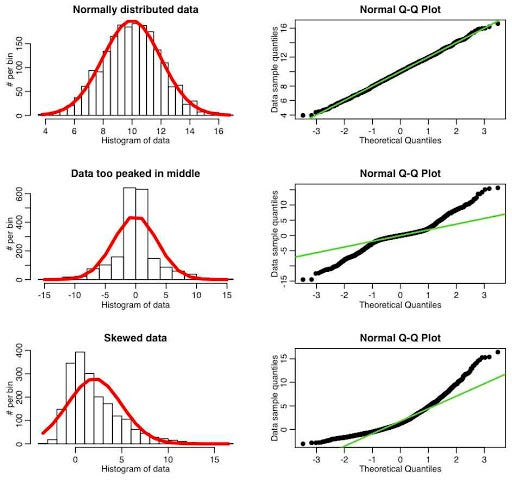

Interpreting the QQ plot:

1. If the points fall approximately along a straight line, it suggests that the data follows a normal distribution.
2. If the points deviate from a straight line in the tails, it indicates heavy tails or outliers.
3. If the points deviate from a straight line in the center, it suggests skewness.


**Remember that QQ plots provide visual indications and are not definitive proof of normality. They serve as a useful diagnostic tool for assessing the distribution of data.

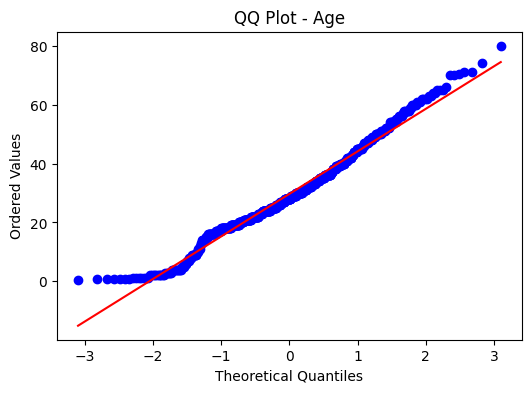

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import probplot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
probplot(age_data, plot=plt)
plt.title("QQ Plot - Age")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()


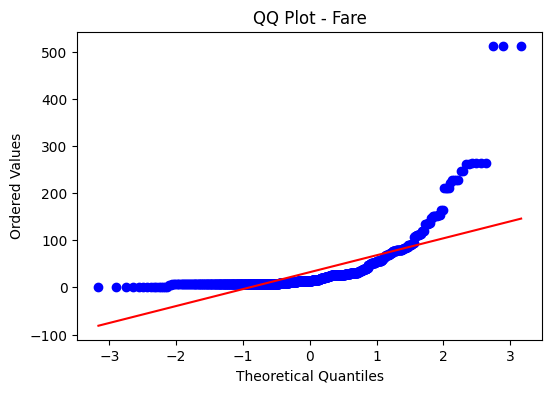

In [ ]:
plt.figure(figsize=(6, 4))
probplot(fare_data, plot=plt)
plt.title("QQ Plot - Fare")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()

## Shapiro-wilk test
The Shapiro-Wilk test is a statistical test used to check if a set of data follows a normal distribution. A normal distribution is a bell-shaped curve that represents a common pattern in many natural and social phenomena.

The Shapiro-Wilk test compares your data to what we would expect from a normal distribution. It calculates a test statistic and a p-value. The test statistic measures how different your data is from a normal distribution. The p-value tells you the probability of obtaining such a test statistic if the data were actually sampled from a normal distribution.

When you perform the Shapiro-Wilk test, you look at the p-value. If the p-value is greater than a certain significance level (often set at 0.05), it suggests that your data is similar enough to a normal distribution. In simpler terms, if the p-value is high, it means your data is likely normally distributed. On the other hand, if the p-value is low, it indicates that your data does not follow a normal distribution.


In [ ]:
alpha = 0.05  # significance level

shapiro_age = shapiro(age_data)


shapiro_fare = shapiro(fare_data)


print("Shapiro-Wilk Test - Age:")
print(f"Statistic: {shapiro_age[0]}, p-value: {shapiro_age[1]}")
print(f"Is normally distributed: {shapiro_age[1] > alpha}\n")

print("Shapiro-Wilk Test - Fare:")
print(f"Statistic: {shapiro_fare[0]}, p-value: {shapiro_fare[1]}")
print(f"Is normally distributed: {shapiro_fare[1] > alpha}\n")


Shapiro-Wilk Test - Age:
Statistic: 0.981458306312561, p-value: 7.340329943872348e-08
Is normally distributed: False

Shapiro-Wilk Test - Fare:
Statistic: 0.5218917727470398, p-value: 1.0789998175301091e-43
Is normally distributed: False



## The D'Agostino-Pearson test

This is a statistical test used to check if a set of data follows a normal distribution. In simpler terms, it helps us determine whether our data looks like a bell-shaped curve, which is a common pattern observed in many natural and social phenomena.

The test calculates a test statistic and a p-value. The test statistic measures how different our data is from a normal distribution. The p-value tells us the probability of obtaining such a test statistic if the data were actually sampled from a normal distribution.

To perform the D'Agostino-Pearson test, we look at the p-value. If the p-value is greater than a chosen significance level (often set at 0.05), it suggests that our data is similar enough to a normal distribution. This means our data looks like a bell-shaped curve. On the other hand, if the p-value is lower than the significance level, it indicates that our data does not follow a normal distribution. In simpler terms, our data looks different from a bell-shaped curve.

The D'Agostino-Pearson test takes into account various statistical properties of the data, such as skewness (the lack of symmetry) and kurtosis (the shape of the tails). By considering these aspects, the test provides a more comprehensive assessment of normality compared to some other tests.

In [ ]:
dagostino_age = normaltest(age_data)
dagostino_fare = normaltest(fare_data)

print("D'Agostino-Pearson Test - Age:")
print(f"Statistic: {dagostino_age[0]}, p-value: {dagostino_age[1]}")
print(f"Is normally distributed: {dagostino_age[1] > alpha}\n")


print("D'Agostino-Pearson Test - Fare:")
print(f"Statistic: {dagostino_fare[0]}, p-value: {dagostino_fare[1]}")
print(f"Is normally distributed: {dagostino_fare[1] > alpha}\n")


D'Agostino-Pearson Test - Age:
Statistic: 18.105032952089758, p-value: 0.00011709599657350757
Is normally distributed: False

D'Agostino-Pearson Test - Fare:
Statistic: 904.5872705326926, p-value: 3.727091062842147e-197
Is normally distributed: False

